## Importing Necessary Libraries and modules

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
plt.style.use('ggplot') #The 'ggplot' style in Matplotlib attempts to replicate the aesthetics and design principles of the "ggplot2" package.

### Reading the Dataset and basic cleaning

In [75]:
df=pd.read_csv('/Users/simar/Downloads/BYOP_CryNER/articlesData-2.csv')

# **Data Preprocessing**
* Checking shape and dropping unrelated columns.

In [76]:
df.shape

(26751, 12)

In [77]:
df.head()



,Unnamed: 0,_id,id,Domain,Source,Title,Date,Slug,Currencies,URL,Created_at,Language
0,0,6370ccb976d97ef11693a994,16882348,de.cryptonews.com,Cryptonews.Com DE,Die Handelsstrategie von Arbismart verspricht ...,2022-11-13T07:00:00Z,Die-Handelsstrategie-von-Arbismart-verspricht-...,Tether Shiba Inu,https://cryptopanic.com/news/16882348/Die-Hand...,2022-11-13T07:00:00Z,de
1,1,6370ccb976d97ef11693a995,16882176,btc-echo.de,BTC ECHO,Krypto-News: Das sind die 5 wichtigsten Neuigk...,2022-11-13T07:00:00Z,Krypto-News-Das-sind-die-5-wichtigsten-Neuigke...,FTX,https://cryptopanic.com/news/16882176/Krypto-N...,2022-11-13T07:00:00Z,de
2,2,6370ccba76d97ef11693a996,16880557,de.cointelegraph.com,CoinTelegraph DE,Sam Bankman-Fried dementiert Flucht nach Argen...,2022-11-12T22:15:00Z,Sam-Bankman-Fried-dementiert-Flucht-nach-Argen...,FTX,https://cryptopanic.com/news/16880557/Sam-Bank...,2022-11-12T22:15:00Z,de
3,3,6370ccba76d97ef11693a997,16880259,de.cointelegraph.com,CoinTelegraph DE,Binance-CEO spricht erstmals öffentlich über d...,2022-11-12T19:00:00Z,Binance-CEO-spricht-erstmals-offentlich-uber-d...,FTX,https://cryptopanic.com/news/16880259/Binance-...,2022-11-12T19:00:00Z,de
4,4,6370ccba76d97ef11693a998,16880075,de.cointelegraph.com,CoinTelegraph DE,FTX US schaltet „still und heimlich“ Auszahlun...,2022-11-12T17:40:00Z,FTX-US-schaltet-still-und-heimlich-Auszahlunge...,FTX,https://cryptopanic.com/news/16880075/FTX-US-s...,2022-11-12T17:40:00Z,de


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26751 entries, 0 to 26750
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26751 non-null  int64 
 1   _id         26751 non-null  object
 2   id          26751 non-null  int64 
 3   Domain      26751 non-null  object
 4   Source      26751 non-null  object
 5   Title       26750 non-null  object
 6   Date        26751 non-null  object
 7   Slug        26751 non-null  object
 8   Currencies  15862 non-null  object
 9   URL         26751 non-null  object
 10  Created_at  26751 non-null  object
 11  Language    26751 non-null  object
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


#### Extracting unigrams,bigrams,trigrams from Currencies column in dataframe which would be used later in training data 

In [79]:
df['Currencies']=df['Currencies'].astype('string') # changing datatype to string
# Extract unique currencies from the "Currencies" column
unique_currencies = df['Currencies'].unique()

# Initialize lists for unigrams, bigrams, and trigrams
Currencies_uni = []
Currencies_bi = []
Currencies_tri = []

# Separate unigrams, bigrams, and trigrams
for currency in unique_currencies:
    # Check if the value is a string and not a special value
    if isinstance(currency, str):
        words = currency.split()  # Split the string into words
        if len(words) == 1:
            Currencies_uni.append(currency)
        elif len(words) == 2:
            Currencies_bi.append(currency)
        elif len(words) == 3:
            Currencies_tri.append(currency)

print("Unigrams:", Currencies_uni)
print("Bigrams:", Currencies_bi)
print("Trigrams:", Currencies_tri)

Unigrams: ['FTX ', 'Bitcoin ', 'Chain ', 'Ethereum ', 'Solana ', 'Chiliz ', 'TRON ', 'Dogecoin ', 'XRP ', 'Helium ', 'Huobi ', 'Cardano ', 'Polygon ', 'Uniswap ', 'Cronos ', 'Dash ', 'Maker ', 'Hedera ', 'Avalanche ', 'Quant ', 'Polkadot ', 'Arweave ', 'Dai ', 'KuCoin ', '1inch ', 'ApeCoin ', 'Algorand ', 'Chainlink ', 'NEXO ', 'TerraClassicUSD ', 'Tether ', 'BNB ', 'VeChain ', 'Stellar ', 'Filecoin ', 'Litecoin ', 'Aave ', 'IOTA ', 'Aptos ', 'Flow ', 'Tezos ', 'EOS ', 'NEO ', 'Klaytn ', 'Fantom ', 'PancakeSwap ', 'Decentraland ', 'Sushi ', 'ImmutableX ', 'Gate ', 'Osmosis ', 'USDD ', 'GMX ', 'Toncoin ', 'OKB ', 'TrueUSD ', 'BitDAO ', 'Radix ', 'OKC ', 'Monero ', 'Zilliqa ', 'GALA ', 'Terra ', 'Bitconnect ', 'Flare ', 'Optimism ', 'EthereumPoW ', 'Kava ', 'dYdX ', 'Loopring ', 'Render ', 'Zcash ', 'SingularityNET ', 'Fetch.ai ', 'Blur ', 'Frax ', 'FLOKI ', 'MultiversX ', 'WEMIX ', 'Conflux ', 'Stacks ', 'HEX ']
Bigrams: ['Bitcoin FTX ', 'Bitcoin TRON ', 'Shiba Inu ', 'Bitcoin Solana ',

In [80]:
df.columns=['naa','_id','id', 'Domain','Source','Title','Date','Slug','Currencies','URL','Created_at','Language']
# Dataset has Two languages : en and de, so removing rows with language=de

df.drop(df[df['Language'] == 'de'].index, inplace=True)
df.reset_index(drop=True, inplace=True) # to reset the index and make sure that index of dropped columns doesnt contain dropped values (drop=0)



In [81]:
df.drop(['naa','_id', 'Domain','Source','Date','Slug','URL','Created_at','Language','Currencies'], axis=1, inplace=True)

In [82]:
df.head(5)

,id,Title
0,16884976,Binance CEO Says Why You Should Avoid Exchange...
1,16884983,Bitcoin (BTC) Miners Sell Most in 5 Years
2,16884964,Binance CEO: Deal To Acquire FTX.com ‘Did Not ...
3,16884948,Top Crypto Strategist Warns Dogecoin and Polyg...
4,16884786,"Shiba Inu Returns to Bottom Again, What's Next?"


### Checking and deleting null values

In [83]:
#check for null values
pd.isnull(df).sum()
# or by columns
#for x in df.columns:
 #count = df[x].isnull().sum()
# print(f'Number of nan in {x} are:',count)

id       0
Title    1
dtype: int64

In [84]:
# drop null values, though just one NaN value in Title column, so not much helpful in this case.
df.dropna(inplace=True)

In [85]:
df.shape


(23521, 2)

In [86]:
#checking datatype
print(df['Title'].dtype)
print(df['id'].dtype)

object
int64


In [87]:
#checking duplicated data
df.duplicated().sum()

0

In [88]:
df.head()

,id,Title
0,16884976,Binance CEO Says Why You Should Avoid Exchange...
1,16884983,Bitcoin (BTC) Miners Sell Most in 5 Years
2,16884964,Binance CEO: Deal To Acquire FTX.com ‘Did Not ...
3,16884948,Top Crypto Strategist Warns Dogecoin and Polyg...
4,16884786,"Shiba Inu Returns to Bottom Again, What's Next?"


# EDA on the given **Dataset**
* ###  Little bit of feature engineering

In [89]:
df['content_len'] = df['Title'].apply(lambda x: len(x))
df['word count'] = df['Title'].apply (lambda x: len(x.split()))



In [90]:
def get_avg_word_len(x):
    words = x.split()
    word_len= 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [91]:
df['avg _word _len'] = df['Title'].apply (lambda x: get_avg_word_len(x))

In [92]:
df.head()

,id,Title,content_len,word count,avg _word _len
0,16884976,Binance CEO Says Why You Should Avoid Exchange...,60,11,4.545455
1,16884983,Bitcoin (BTC) Miners Sell Most in 5 Years,41,8,4.250000
2,16884964,Binance CEO: Deal To Acquire FTX.com ‘Did Not ...,81,15,4.466667
3,16884948,Top Crypto Strategist Warns Dogecoin and Polyg...,111,16,6.000000
4,16884786,"Shiba Inu Returns to Bottom Again, What's Next?",47,8,5.000000


# Disribution of Message Text Length and Word Length

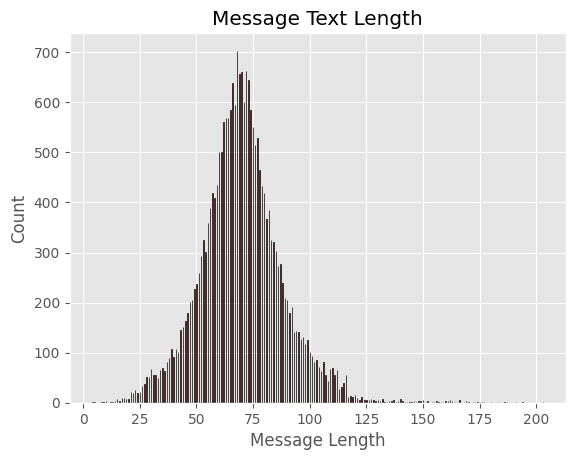

In [180]:
plt.hist(df['content_len'], bins=1000, edgecolor='black')

plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Message Text Length')

plt.show()

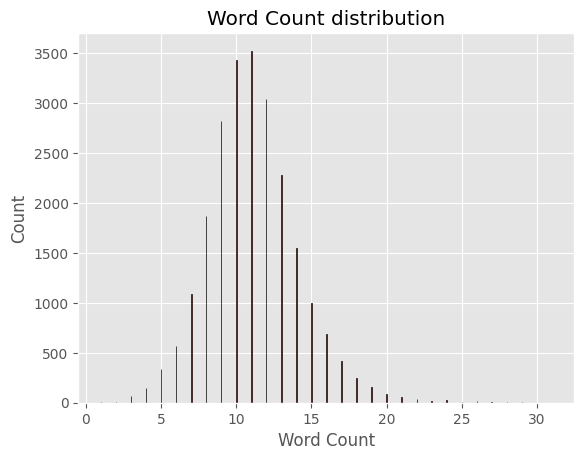

In [181]:
plt.hist(df['word count'], bins=1000, edgecolor='black')  


plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Word Count distribution')

plt.show()

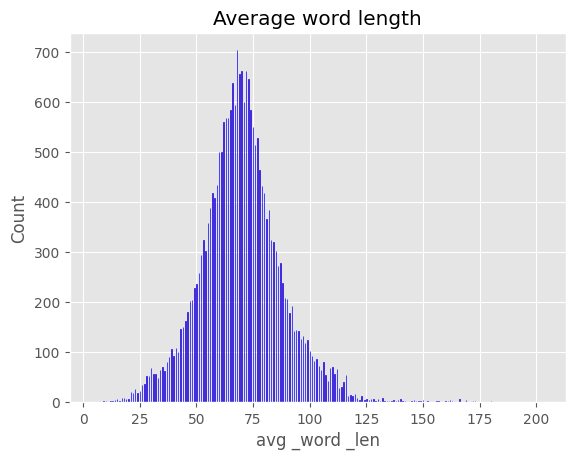

In [182]:
plt.hist(df['content_len'], bins=1000, edgecolor='blue')  # Adjust the number of bins as needed

plt.xlabel('avg _word _len')
plt.ylabel('Count')
plt.title('Average word length')

plt.show()

## Removing Stopwords

In [96]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS)

326

In [97]:
#spacy.cli.download("en_core_web_sm")


In [98]:
#loading the English language model ("en_core_web_sm") from the spaCy library for natural language processing (NLP)
nlp = spacy.load("en_core_web_sm")

In [99]:
def preprocess(text):
    doc = nlp(text) #creating nlp object

    no_stop_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(no_stop_words) #to convert list to sentence

In [100]:
df["Title_new"] = df.Title.apply(preprocess)


In [101]:
df.head()

,id,Title,content_len,word count,avg _word _len,Title_new
0,16884976,Binance CEO Says Why You Should Avoid Exchange...,60,11,4.545455,Binance CEO Says Avoid Exchanges
1,16884983,Bitcoin (BTC) Miners Sell Most in 5 Years,41,8,4.250000,Bitcoin ( BTC ) Miners Sell 5 Years
2,16884964,Binance CEO: Deal To Acquire FTX.com ‘Did Not ...,81,15,4.466667,Binance CEO : Deal Acquire FTX.com ‘ Sense Num...
3,16884948,Top Crypto Strategist Warns Dogecoin and Polyg...,111,16,6.000000,Crypto Strategist Warns Dogecoin Polygon Holde...
4,16884786,"Shiba Inu Returns to Bottom Again, What's Next?",47,8,5.000000,"Shiba Inu Returns , ?"


### Distribution of Unigram, Bigram and Trigrams

* #### Unigrams with StopWords

In [102]:
from sklearn.feature_extraction.text import CountVectorizer                             #CountVectorizer() is a class from scikit-learn used to convert a collection of text documents to a matrix of token counts (Bag of Words representation)
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)                                                              #Transform the documents to a bag-of-words matrix
    sum_words = bow.sum(axis = 0)                                                       #Calculate the sum of word occurrences
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]   #Create a list of word frequencies, the tuple (word, sum_words[0, idx]) is created, representing the word and its total count in the corpus.
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]                                                               #the function returns the first n elements of the sorted list

In [103]:
words = get_top_n_words(df['Title'], 20)

In [104]:
words

[('to', 7086),
 ('crypto', 6107),
 ('in', 4897),
 ('bitcoin', 4615),
 ('the', 3949),
 ('of', 3560),
 ('for', 3327),
 ('and', 2617),
 ('on', 2478),
 ('as', 2365),
 ('is', 2068),
 ('ftx', 2038),
 ('price', 1935),
 ('with', 1490),
 ('ethereum', 1424),
 ('says', 1347),
 ('this', 1180),
 ('new', 1154),
 ('market', 1074),
 ('binance', 1066)]

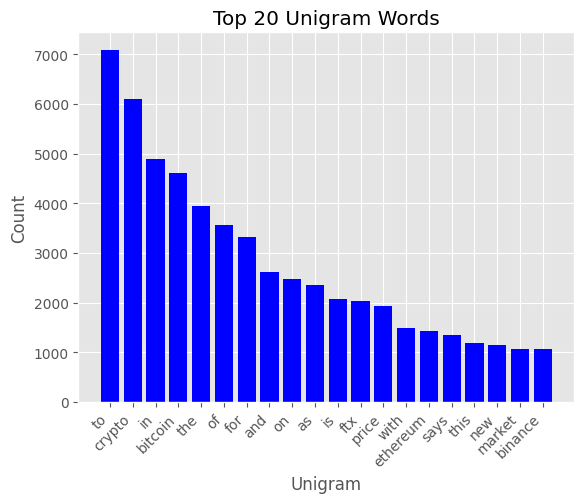

In [105]:
df1 = pd.DataFrame(words, columns=['Unigram', 'Frequency'])
plt.bar(df1['Unigram'], df1['Frequency'], color='blue')
plt.xlabel('Unigram')
plt.ylabel('Count')
plt.title('Top 20 Unigram Words')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

#### Bigrams with StopWords

In [106]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

words = get_top_n_words(df['Title'], 20)  

In [107]:
words

[('bankman fried', 524),
 ('shiba inu', 462),
 ('sam bankman', 402),
 ('in 2023', 400),
 ('bitcoin price', 397),
 ('price prediction', 366),
 ('in the', 332),
 ('crypto exchange', 331),
 ('in crypto', 299),
 ('here why', 260),
 ('here what', 257),
 ('ftx collapse', 252),
 ('bitcoin btc', 245),
 ('to buy', 242),
 ('crypto market', 234),
 ('000 000', 227),
 ('prediction as', 226),
 ('for crypto', 222),
 ('of the', 220),
 ('on the', 216)]

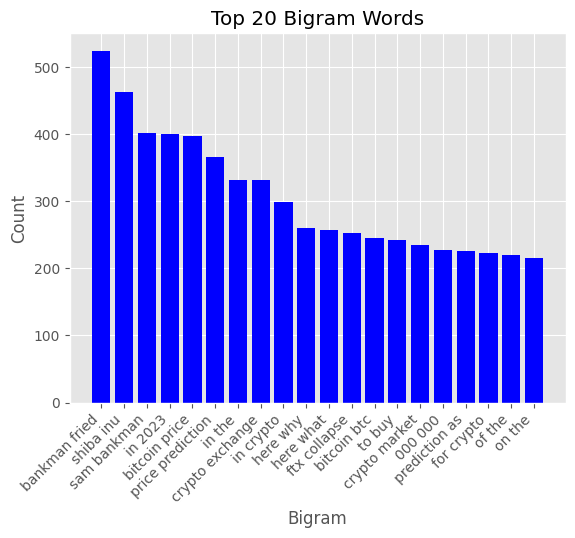

In [108]:
df1 = pd.DataFrame(words, columns=['Bigram', 'Frequency']) 
plt.bar(df1['Bigram'], df1['Frequency'], color='blue')
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Top 20 Bigram Words')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Trigrams with StopWords

In [109]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

words = get_top_n_words(df['Title'], 20)   

In [110]:
words

[('sam bankman fried', 398),
 ('price prediction as', 226),
 ('shiba inu shib', 178),
 ('proof of reserves', 99),
 ('you need to', 91),
 ('shorts bitcoin crypto', 91),
 ('bitcoin price prediction', 90),
 ('markets bitcoin ether', 87),
 ('need to know', 85),
 ('to buy today', 71),
 ('best crypto to', 70),
 ('crypto to buy', 70),
 ('000 000 in', 67),
 ('today in crypto', 66),
 ('bitcoin and ethereum', 63),
 ('what you need', 60),
 ('all time high', 60),
 ('top 10 cryptos', 56),
 ('the future of', 55),
 ('bitcoin price and', 54)]

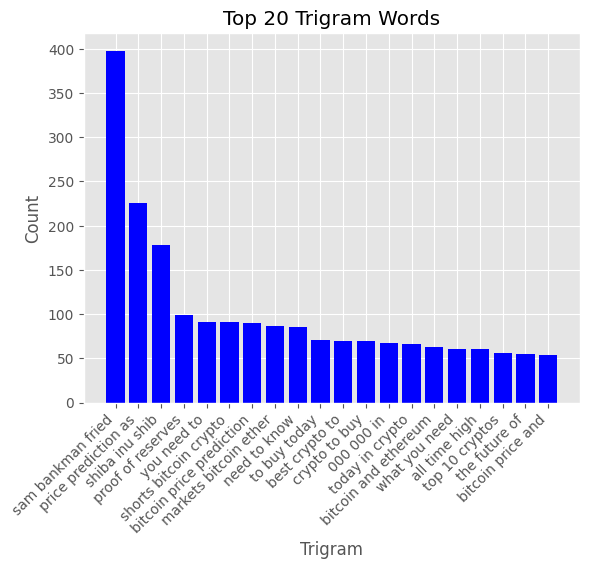

In [111]:
df1 = pd.DataFrame(words, columns=['Trigram', 'Frequency']) #word dict with unigram and freq as column names
plt.bar(df1['Trigram'], df1['Frequency'], color='blue')
plt.xlabel('Trigram')
plt.ylabel('Count')
plt.title('Top 20 Trigram Words')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

#### Unigrams without StopWords

In [112]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [113]:
words = get_top_n_words(df['Title_new'], 20)

In [114]:
words

[('crypto', 6107),
 ('bitcoin', 4615),
 ('ftx', 2038),
 ('price', 1935),
 ('ethereum', 1424),
 ('says', 1347),
 ('new', 1154),
 ('market', 1074),
 ('binance', 1066),
 ('btc', 1066),
 ('2023', 970),
 ('000', 924),
 ('sec', 757),
 ('million', 735),
 ('nft', 729),
 ('report', 717),
 ('exchange', 626),
 ('xrp', 624),
 ('ceo', 622),
 ('cardano', 581)]

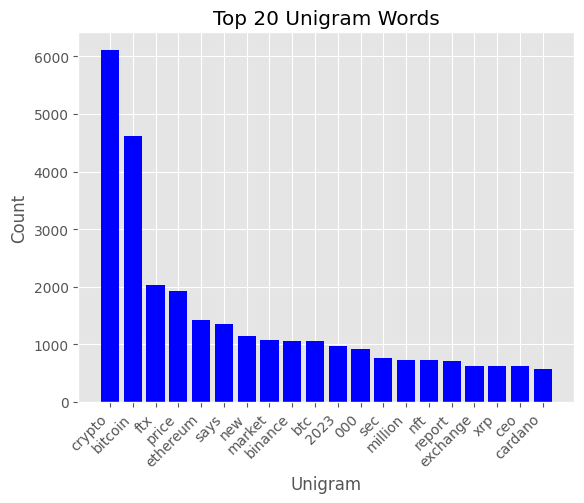

In [115]:
df1 = pd.DataFrame(words, columns=['Unigram', 'Frequency']) 
plt.bar(df1['Unigram'], df1['Frequency'], color='blue')
plt.xlabel('Unigram')
plt.ylabel('Count')
plt.title('Top 20 Unigram Words')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Bigrams without StopWords

In [116]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [117]:
words = get_top_n_words(df['Title_new'], 20)

In [118]:
words

[('bankman fried', 524),
 ('shiba inu', 462),
 ('sam bankman', 402),
 ('bitcoin price', 397),
 ('price prediction', 366),
 ('crypto exchange', 331),
 ('ftx collapse', 255),
 ('bitcoin btc', 247),
 ('crypto market', 237),
 ('000 000', 227),
 ('bitcoin mining', 195),
 ('bitcoin crypto', 184),
 ('inu shib', 182),
 ('bear market', 165),
 ('ethereum eth', 160),
 ('cardano ada', 156),
 ('btc price', 152),
 ('elon musk', 151),
 ('markets bitcoin', 149),
 ('hong kong', 145)]

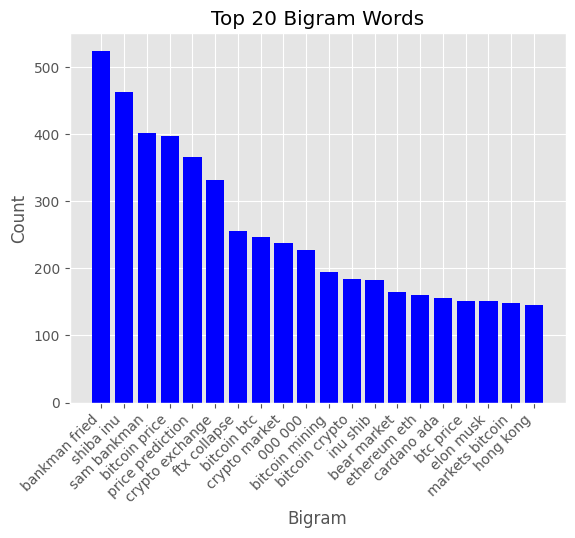

In [119]:
df1 = pd.DataFrame(words, columns=['Bigram', 'Frequency']) 
plt.bar(df1['Bigram'], df1['Frequency'], color='blue')
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Top 20 Bigram Words')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Trigram without stopwords

In [120]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [121]:
words = get_top_n_words(df['Title_new'], 20)

In [122]:
words

[('sam bankman fried', 398),
 ('shiba inu shib', 180),
 ('shorts bitcoin crypto', 91),
 ('markets bitcoin ether', 91),
 ('bitcoin price prediction', 90),
 ('best crypto buy', 70),
 ('crypto buy today', 66),
 ('bitcoin price ethereum', 54),
 ('learning algorithm sets', 52),
 ('000 000 000', 51),
 ('machine learning algorithm', 51),
 ('price prediction btc', 50),
 ('xrp price prediction', 49),
 ('terra luna classic', 48),
 ('bitcoin mining report', 47),
 ('btc eth bnb', 43),
 ('eth bnb xrp', 43),
 ('classic price prediction', 42),
 ('luna classic price', 41),
 ('price ethereum prediction', 40)]

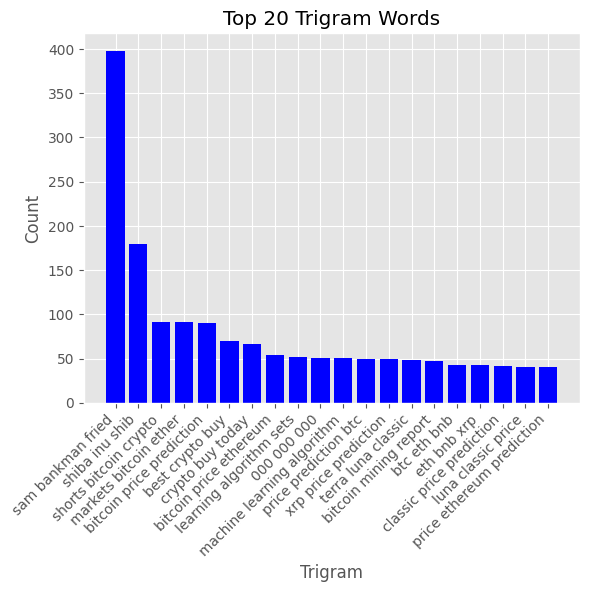

In [123]:
df1 = pd.DataFrame(words, columns=['Trigram', 'Frequency']) 
plt.bar(df1['Trigram'], df1['Frequency'], color='blue')
plt.xlabel('Trigram')
plt.ylabel('Count')
plt.title('Top 20 Trigram Words')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Rule based NER model

### Let's make a NER model to extract the phrases, starting off with an Naive Rule Based NER

In [142]:
# Manually adding some unigrams which would be later used in annotating data 
Cry_list = [
    "Altcoin", "ASIC", "Bitcoin", "Buy the dip", "Blockchain", "Coin", "Cold wallet", "Cryptocurrency", 
    "Cryptography", "dApp", "DeFi", "DAO", "Distributed ", 'Dash', "ledger", "Double spend", "Exchange", 
    "Ether", "Ethereum", "Encryption", "Fiat" , "currency", "Fork", "Gas", "Graphics card", "Hash", "wallet", 
    "ICO", "Jager", "KYC", "Ledger", "Market" "capitalization", "Mining", "Meme coin", "Node", "NFT", "On-chain", 
    "On-ledger currency", "Orphan block", "P2P", "Private key", "Public key", "Proof of work", "Proof of stake", 
    "Quantum" , "computing", "Regulated", "Satoshi" , "Nakamoto", "Satoshi", "Smart contract", "Contract", "SHA-256", 
    "Seed", "Stablecoin", "Tether", "Terahash", "Token", "USD Coin", "Volume", "Validator", "Volatility", "Wallet", 
    "Wei", "Whitepaper", "XRP", "Yield", "Zero confirmation", "Altseason", "Binance", "Cryptographic" "Decentralization", 
    "Digital signature", "ERC-20", "Halving","altcoins","ripple","cash", "Immutable", "Liquidity", "Market order", 
    "Node runner", "Oracle",  "Quantstamp", "Rekt", "Smart contract platform", "Tokenomics", "Uniswap", 
    "Volatility index", "Wallet recovery phrase", "XLM", "Stellar Lumens", "Yield farming", "Zcash", "51% Attack", 
    'Dogecoin', "BTC", "ETH", "XRP", "LTC", "BCH", "ADA", "XLM", "EOS", "XMR", "DASH", "NEO", "TRX", "XEM", "VET", 
    "ATOM", "LINK", 'Altcoins','ripple',"XVG", "BAT", "ZEC", "ICX", "ONT", "XIN", "OMG", "DOGE" ,"FTX",'miners','crypto'
]

## Also adding Currencies_uni
Cry_list.extend(Currencies_uni)
Cry_list

['Altcoin',
 'ASIC',
 'Bitcoin',
 'Buy the dip',
 'Blockchain',
 'Coin',
 'Cold wallet',
 'Cryptocurrency',
 'Cryptography',
 'dApp',
 'DeFi',
 'DAO',
 'Distributed ',
 'Dash',
 'ledger',
 'Double spend',
 'Exchange',
 'Ether',
 'Ethereum',
 'Encryption',
 'Fiat',
 'currency',
 'Fork',
 'Gas',
 'Graphics card',
 'Hash',
 'wallet',
 'ICO',
 'Jager',
 'KYC',
 'Ledger',
 'Marketcapitalization',
 'Mining',
 'Meme coin',
 'Node',
 'NFT',
 'On-chain',
 'On-ledger currency',
 'Orphan block',
 'P2P',
 'Private key',
 'Public key',
 'Proof of work',
 'Proof of stake',
 'Quantum',
 'computing',
 'Regulated',
 'Satoshi',
 'Nakamoto',
 'Satoshi',
 'Smart contract',
 'Contract',
 'SHA-256',
 'Seed',
 'Stablecoin',
 'Tether',
 'Terahash',
 'Token',
 'USD Coin',
 'Volume',
 'Validator',
 'Volatility',
 'Wallet',
 'Wei',
 'Whitepaper',
 'XRP',
 'Yield',
 'Zero confirmation',
 'Altseason',
 'Binance',
 'CryptographicDecentralization',
 'Digital signature',
 'ERC-20',
 'Halving',
 'altcoins',
 'ripple',

In [143]:
text_column = df['Title_new']

# Function to check if Cry_list elements are present in a sentence
def check_cryptos(sentence):
    matched_cryptos = [crypto.lower() for crypto in Cry_list if crypto.lower() in sentence.lower()] #crypto.lower ensures a case-insensitive comparison.
    return matched_cryptos

# Apply the function to the 'Title_new' in the DataFrame
df['matched_cryptos'] = text_column.apply(check_cryptos)

# Display the DataFrame with matched cryptocurrencies
#print(df[['Title_new', 'matched_cryptos']])
df.head()



,id,Title,content_len,word count,avg _word _len,Title_new,matched_cryptos
0,16884976,binance ceo says why you should avoid exchange...,60,11,4.545455,Binance CEO Says Avoid Exchanges,"[exchange, binance]"
1,16884983,bitcoin miners sell most in 5 years,41,8,4.250000,Bitcoin ( BTC ) Miners Sell 5 Years,"[bitcoin, coin, btc, miners, bitcoin ]"
2,16884964,binance deal to acquire not make sense from a ...,81,15,4.466667,Binance CEO : Deal Acquire FTX.com ‘ Sense Num...,"[binance, ont, ftx]"
3,16884948,top crypto strategist warns dogecoin and polyg...,111,16,6.000000,Crypto Strategist Warns Dogecoin Polygon Holde...,"[coin, dogecoin, doge, crypto, dogecoin , poly..."
4,16884786,shiba inu returns to bottom,47,8,5.000000,"Shiba Inu Returns , ?",[]


In [144]:
# # Highlighting entities like person,place,data- here of no use 
# nlp_model = spacy.load("en_core_web_sm")
# def test_model(text):
#     doc = nlp_model(text)
#     entities = []
#     for ent in doc.ents:
#         entities.append((ent.start_char, ent.end_char, ent.label_))
#     if len(entities) > 0:
#         return {"entities": entities}
#     else:
#         return None  # or any other value indicating no entities found

# # Assuming 'Tilte_ent' is the column containing text in your DataFrame
# df['Title_ent'] = df['Title_new'].apply(test_model)
#df.head()

In [145]:
# Annotation of unigrams in data of size 24000 using programming and saving to annotated_data.json

import re 
import json

# Function to annotate entities in a given text
def annotate_entities(text):
    entities = []
    for term in Cry_list:
        matches = re.finditer(fr'\b{re.escape(term)}\b', text, flags=re.IGNORECASE)
        for match in matches:
            start, end = match.span()
            entities.append({
                "start": start,
                "end": end,
                "label": "CRYPTO"
            })
    return entities

# Iterate through the DataFrame and create annotated data
annotated_data = []

for index, row in df.iterrows():
    content = row['Title_new']  # Replace 'Title_new' with the actual column name containing the content
    entities = annotate_entities(content)

    annotated_example = {
        #"id": row['id'],  # Replace '_id' with the actual column name for the ID
        "content": content,
        "entities": entities
    }

    annotated_data.append(annotated_example)

# Output the JSON data
    
with open('annotated_data.json', 'w') as json_file:
    json.dump(annotated_data, json_file, indent=2)

print("JSON data written to annotated_data.json")


JSON data written to annotated_data.json


In [146]:
nlp = spacy.load("en_core_web_lg")
with open('/Users/simar/Downloads/CryNER/annotated_data.json', 'r') as f:
    data = json.load(f)

In [147]:
# Converting training_data into the form required by spacy for training 
training_data = []

for example in data:
    temp_tuple = (
        example['content'],
        {'entities': []}
    )

    for annotation in example['entities']:
        start = annotation['start']
        end = annotation['end']
        label = annotation['label'].lower()  # Convert label to lowercase
        temp_tuple[1]['entities'].append((start, end, label))

    training_data.append(temp_tuple)

# # Display the result
# for example in training_data:
#     print(example)

# # Check the length of the training_data
# print(len(training_data))
training_data


[('Binance CEO Says Avoid Exchanges', {'entities': [(0, 7, 'crypto')]}),
 ('Bitcoin ( BTC ) Miners Sell 5 Years',
  {'entities': [(0, 7, 'crypto'), (10, 13, 'crypto'), (16, 22, 'crypto')]}),
 ('Binance CEO : Deal Acquire FTX.com ‘ Sense Number Fronts ’',
  {'entities': [(0, 7, 'crypto'), (27, 30, 'crypto')]}),
 ('Crypto Strategist Warns Dogecoin Polygon Holders , Says DOGE MATIC Witness Drastic Corrections',
  {'entities': [(24, 32, 'crypto'), (56, 60, 'crypto'), (0, 6, 'crypto')]}),
 ('Shiba Inu Returns , ?', {'entities': []}),
 ('New FTX tokens worth $ 380 million appear thin air',
  {'entities': [(4, 7, 'crypto')]}),
 ('Solana Crashes 12 % Overnight Crypto Markets Bleed ( Market Watch )',
  {'entities': [(30, 36, 'crypto')]}),
 ('Kraken freezes FTX Alameda accounts , ‘ maintains reserves ’',
  {'entities': [(15, 18, 'crypto')]}),
 ('Huobi reports asset transparency , totals $ 3.5 billion hot cold wallets',
  {'entities': []}),
 ('Bahamas regulator contradicts FTX claim required proc

In [148]:
import os
from tqdm import tqdm
from spacy.tokens import DocBin, Span

nlp = spacy.load("en_core_web_sm")  # Load the spaCy model
db = DocBin()  # Create a DocBin object
skipped_entities_count = 0 

for text, annot in tqdm(training_data):  # Iterate over the training data
    doc = nlp.make_doc(text)  # Create a Doc object from text
    ents = []

    for start, end, label in annot["entities"]:  # Iterate over entities in each example
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        
        if span is None:
            print("Skipping entity")
            skipped_entities_count += 1
        else:
            # Check for overlapping entities before adding to the list
            overlap = any(span.start_char < ent.end_char and span.end_char > ent.start_char for ent in ents)
            if not overlap:
                ents.append(span)

    doc.ents = ents  # Label the text with the entities
    db.add(doc)

os.chdir(r'/Users/simar/Downloads/BYOP_CryNER')
db.to_disk("./train.spacy")  # Save the DocBin object
print(f"Number of skipped entities: {skipped_entities_count}")


 16%|█▌        | 3754/23521 [00:00<00:01, 13031.62it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 30%|██▉       | 7052/23521 [00:00<00:01, 15213.72it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 60%|██████    | 14229/23521 [00:00<00:00, 17409.03it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 92%|█████████▏| 21549/23521 [00:01<00:00, 18131.84it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 23521/23521 [00:01<00:00, 16710.26it/s]


Skipping entity
Number of skipped entities: 94


In [149]:
# Filling base_config.cfg file
# !python3 -m spacy init fill-config base_config.cfg config.cfg


✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [150]:
#Training the model
#!python3 -m spacy train config.cfg --output ./output_single --paths.train ./train.spacy --paths.dev ./train.spacy 

ℹ Saving to output directory: output_single
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     46.67    0.01    0.43    0.00    0.00
  0     200         38.12   1180.58   98.86   99.41   98.31    0.99
  0     400         39.64     68.05   99.53   99.90   99.16    1.00
  0     600         38.69     46.49   99.76   99.80   99.73    1.00
  0     800         39.70     42.58   99.86   99.96   99.76    1.00
  0    1000         33.58     36.22   99.95   99.98   99.93    1.00
  0    1200         32.83     33.64   99.96   99.97   99.96    1.00
  1    1400         17.89     15.00   99.98   99.99   99.96    1.00
  1    1600         23.7

In [183]:
from spacy import displacy
nlp1 = spacy.load(r"/Users/simar/Downloads/BYOP_CryNER/output_single/model-best") #load the best model
doc = nlp1("Cryptocurrency, a revolutionary digital asset class, has transformed the traditional financial landscape. At its core, cryptocurrency leverages blockchain technology—a decentralized and transparent ledger—to facilitate secure and immutable transactions. Bitcoin, the pioneering cryptocurrency, introduced the concept of a peer-to-peer electronic cash system, challenging the conventional banking system. Altcoins, such as Ethereum and Ripple, expanded the horizon by incorporating smart contracts and enabling faster cross-border transactions")

#The decentralized nature of cryptocurrencies eliminates the need for intermediaries like banks, fostering financial inclusivity. However, this decentralization also poses challenges, with concerns around regulatory compliance and the potential for illicit activities. Crypto enthusiasts actively engage in trading on cryptocurrency exchanges, leveraging wallets to secure their digital assets. The volatile nature of the market, marked by fluctuations in prices and market capitalization, adds an element of risk and opportunity for investors.") # input sample text

displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

### Extracting bigram phrases 

In [184]:
df['Title'] = df['Title'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.isalnum()]))

def get_bigrams(x):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bigrams = list(vec.vocabulary_.keys())
    return bigrams

bigram_words = get_bigrams(df['Title'])
bigram_words.extend(Currencies_bi) # Adding more bigram terms from Currencies_bi created during preprocessing 
bigram_words

['binance ceo',
 'ceo says',
 'says why',
 'why you',
 'you should',
 'should avoid',
 'avoid exchanges',
 'exchanges that',
 'that do',
 'do this',
 'bitcoin miners',
 'miners sell',
 'sell most',
 'most in',
 'in years',
 'binance deal',
 'deal to',
 'to acquire',
 'acquire not',
 'not make',
 'make sense',
 'sense from',
 'from number',
 'number of',
 'top crypto',
 'crypto strategist',
 'strategist warns',
 'warns dogecoin',
 'dogecoin and',
 'and polygon',
 'polygon says',
 'says doge',
 'doge and',
 'and matic',
 'matic could',
 'could witness',
 'witness drastic',
 'drastic corrections',
 'shiba inu',
 'inu returns',
 'returns to',
 'to bottom',
 'new ftx',
 'ftx tokens',
 'tokens worth',
 'worth about',
 'about million',
 'million appear',
 'appear out',
 'out of',
 'of thin',
 'thin air',
 'solana crashes',
 'crashes overnight',
 'overnight as',
 'as crypto',
 'crypto markets',
 'markets bleed',
 'bleed out',
 'kraken freezes',
 'freezes ftx',
 'ftx and',
 'and alameda',
 'ala

### Getting filtered bigram_words containing crypto words

In [153]:
def get_filtered_bigrams(bigram_list, Cry_list):
    filtered_bigrams = [bigram for bigram in bigram_list if any(word.lower() in Cry_list for word in bigram.split())]
    return filtered_bigrams

# Apply the function to the existing bigram_words list
bigram_filt = get_filtered_bigrams(bigram_words, Cry_list)

# Display the list of filtered bigrams
bigram_filt

['bitcoin miners',
 'miners sell',
 'top crypto',
 'crypto strategist',
 'as crypto',
 'crypto markets',
 'long crypto',
 'crypto needs',
 'impact crypto',
 'crypto space',
 'xrp ledger',
 'ledger integration',
 'unknown crypto',
 'crypto wallet',
 'crypto exchanges',
 'bitcoin cash',
 'cash as',
 'mystery crypto',
 'crypto prices',
 'out crypto',
 'on crypto',
 'crypto collapse',
 'crypto tips',
 'for crypto',
 'crypto industry',
 'in crypto',
 'touching crypto',
 'crypto again',
 'aax crypto',
 'crypto exchange',
 'crypto amid',
 'crypto political',
 'blames crypto',
 'crypto for',
 'and crypto',
 'up crypto',
 'crypto recovery',
 'from crypto',
 'crypto market',
 'this crypto',
 'silent crypto',
 'crypto whale',
 'crypto newbies',
 'ripple fund',
 'update crypto',
 'announces crypto',
 'old crypto',
 'crypto warning',
 'rings crypto',
 'crypto news',
 'hot wallet',
 'wallet spikes',
 'of crypto',
 'crypto miner',
 'crypto winter',
 'trust wallet',
 'crypto away',
 'accuses crypto',


### Now let's train bigram crypto phrases detection model 
Repeating same process

#### Annotated file already created, So commenting the code 

Code took around 3 hours for annotation and annotated file saved as annot_bigram.json

In [154]:
# import re 
# import json
# # Function to annotate bigram entities in a given text
# def annotate_entities(text):
#     entities = []
#     for term in bigram_filt:
#         matches = re.finditer(fr'\b{re.escape(term)}\b', text, flags=re.IGNORECASE)
#         for match in matches:
#             start, end = match.span()
#             entities.append({
#                 "start": start,
#                 "end": end,
#                 "label": "CRYPTO"
#             })
#     return entities

# # Iterate through the DataFrame and create annotated data
# annot_bigram= []

# for index, row in df.iterrows():
#     content = row['Title']  # Replace 'Title_new' with the actual column name containing the content
#     entities = annotate_entities(content)

#     annotated1_example = {
#         #"id": row['id'],  # Replace '_id' with the actual column name for the ID
#         "content": content,
#         "entities": entities
#     }

#     annot_bigram.append(annotated1_example)

# # Output the JSON data
# with open('annot_bigram.json', 'w') as json_file:
#     json.dump(annot_bigram, json_file, indent=2)

# print("JSON data written to annot_bigram.json")


In [155]:
nlp = spacy.load("en_core_web_lg")
with open('/Users/simar/Downloads/BYOP_CryNER/annot_bigram.json', 'r') as f:
    data2 = json.load(f)

In [156]:
# Converting training_data2 into the form required by spacy for training 
training_data2 = []

for example in data2:
    temp_tuple = (
        example['content'],
        {'entities': []}
    )

    for annotation in example['entities']:
        start = annotation['start']
        end = annotation['end']
        label = annotation['label'].lower()  # Convert label to lowercase
        temp_tuple[1]['entities'].append((start, end, label))

    training_data2.append(temp_tuple)

# # Display the result
# for example in training_data:
#     print(example)

# # Check the length of the training_data
# print(len(training_data))
training_data2


[('binance ceo says why you should avoid exchanges that do this',
  {'entities': []}),
 ('bitcoin miners sell most in 5 years',
  {'entities': [(0, 14, 'crypto'), (8, 19, 'crypto')]}),
 ('binance deal to acquire not make sense from a number of', {'entities': []}),
 ('top crypto strategist warns dogecoin and polygon says doge and matic could witness drastic corrections',
  {'entities': [(0, 10, 'crypto'), (4, 21, 'crypto')]}),
 ('shiba inu returns to bottom', {'entities': []}),
 ('new ftx tokens worth about million appear out of thin air',
  {'entities': []}),
 ('solana crashes overnight as crypto markets bleed out',
  {'entities': [(25, 34, 'crypto'), (28, 42, 'crypto')]}),
 ('kraken freezes ftx and alameda full', {'entities': []}),
 ('huobi reports on asset totals billion in hot and cold wallets',
  {'entities': []}),
 ('bahamas regulator contradicts ftx claim that it was required to process local withdrawals',
  {'entities': []}),
 ('vitalik buterin calls out ftx for virtue what', {'

In [185]:

nlp = spacy.load("en_core_web_sm")  # Load the spaCy model
db = DocBin()  # Create a DocBin object
skipped_entities_count = 0 

for text, annot in tqdm(training_data2):  # Iterate over the training data
    doc = nlp.make_doc(text)  # Create a Doc object from text
    ents = []

    for start, end, label in annot["entities"]:  # Iterate over entities in each example
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        
        if span is None:
            print("Skipping entity")
            skipped_entities_count += 1
        else:
            # Check for overlapping entities before adding to the list
            overlap = any(span.start_char < ent.end_char and span.end_char > ent.start_char for ent in ents)
            if not overlap:
                ents.append(span)

    doc.ents = ents  # Label the text with the entities
    db.add(doc)

os.chdir(r'/Users/simar/Downloads/BYOP_CryNER')
db.to_disk("./trainbi.spacy")  # Save the DocBin object
print(f"Number of skipped entities: {skipped_entities_count}")


100%|██████████| 23521/23521 [00:01<00:00, 19824.64it/s]


Number of skipped entities: 0


In [162]:
# Training the model
# !python3 -m spacy train config.cfg --output ./output_bigram --paths.train ./trainbi.spacy --paths.dev ./trainbi.spacy 

ℹ Saving to output directory: output_bigram
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     45.17    0.00    0.00    0.00    0.00
  0     200         18.45   1107.92   62.39   65.69   59.40    0.62
  0     400         46.65    343.65   81.49   84.56   78.63    0.81
  0     600         43.51    380.53   84.22   85.24   83.24    0.84
  0     800         67.26    451.61   86.87   89.34   84.54    0.87
  0    1000         42.75    426.70   84.47   85.82   83.16    0.84
  1    1200         40.57    519.32   90.48   91.26   89.71    0.90
  1    1400         54.61    461.74   93.14   93.78   92.50    0.93
  1    1600        103.9

In [189]:
nlp1 = spacy.load(r"/Users/simar/Downloads/BYOP_CryNER/output_bigram/model-best") #load the best model
doc = nlp1("Cryptocurrency, a revolutionary digital asset class, has transformed the traditional financial landscape. At its core, cryptocurrency leverages blockchain technology—a decentralized and transparent ledger—to facilitate secure and immutable transactions. Bitcoin, the pioneering cryptocurrency, introduced the concept of a peer-to-peer electronic cash system, challenging the conventional banking system. Altcoins, such as Ethereum and Ripple, expanded the horizon by incorporating smart contracts and enabling faster cross-border transactions")


displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

#### Extracting trigram phrases

In [164]:
df['Title'] = df['Title'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.isalnum()]))

def get_trigrams(x):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bigrams = list(vec.vocabulary_.keys())
    return bigrams

trigram_words = get_trigrams(df['Title'])
trigram_words


['binance ceo says',
 'ceo says why',
 'says why you',
 'why you should',
 'you should avoid',
 'should avoid exchanges',
 'avoid exchanges that',
 'exchanges that do',
 'that do this',
 'bitcoin miners sell',
 'miners sell most',
 'sell most in',
 'most in years',
 'binance deal to',
 'deal to acquire',
 'to acquire not',
 'acquire not make',
 'not make sense',
 'make sense from',
 'sense from number',
 'from number of',
 'top crypto strategist',
 'crypto strategist warns',
 'strategist warns dogecoin',
 'warns dogecoin and',
 'dogecoin and polygon',
 'and polygon says',
 'polygon says doge',
 'says doge and',
 'doge and matic',
 'and matic could',
 'matic could witness',
 'could witness drastic',
 'witness drastic corrections',
 'shiba inu returns',
 'inu returns to',
 'returns to bottom',
 'new ftx tokens',
 'ftx tokens worth',
 'tokens worth about',
 'worth about million',
 'about million appear',
 'million appear out',
 'appear out of',
 'out of thin',
 'of thin air',
 'solana cra

### Getting filtered trigram_words containing crypto words

In [165]:
def get_filtered_trigrams(trigram_list, Cry_list):
    filtered_trigrams = [trigram for trigram in trigram_list if any(word.lower() in Cry_list for word in trigram.split())]
    return filtered_trigrams

# Apply the function to the existing bigram_words list
trigram_filt = get_filtered_trigrams(trigram_words, Cry_list)

# Display the list of filtered bigrams
trigram_filt

#Limiting the list for training of trigram model as during training it was taking unsually high time
trigram_filt2=trigram_filt[0:1000]
trigram_filt2
#len(trigram_filt)

['bitcoin miners sell',
 'miners sell most',
 'top crypto strategist',
 'crypto strategist warns',
 'overnight as crypto',
 'as crypto markets',
 'crypto markets bleed',
 'how long crypto',
 'long crypto needs',
 'crypto needs to',
 'will impact crypto',
 'impact crypto space',
 'completed xrp ledger',
 'xrp ledger integration',
 'ledger integration for',
 'to unknown crypto',
 'unknown crypto wallet',
 'crypto exchanges and',
 'adopt bitcoin cash',
 'bitcoin cash as',
 'cash as legal',
 'sheet mystery crypto',
 'mystery crypto prices',
 'crypto prices weak',
 'calls out crypto',
 'week on crypto',
 'on crypto collapse',
 'crypto collapse as',
 'crypto tips from',
 'over for crypto',
 'for crypto industry',
 'week in crypto',
 'in crypto prices',
 'crypto prices plummeted',
 'before touching crypto',
 'touching crypto again',
 'aax crypto exchange',
 'crypto exchange suspends',
 'crypto prices slide',
 'urge for crypto',
 'for crypto amid',
 'crypto amid increasing',
 'crypto exchange 

In [166]:
#Limiting dataset for training of trigram  model as for entire dataset it was taking unsually high time for annotation 
df_new=pd.DataFrame()
df_new['Title_trigram']= df['Title'].head(1000)
df_new

,Title_trigram
0,binance ceo says why you should avoid exchange...
1,bitcoin miners sell most in 5 years
2,binance deal to acquire not make sense from a ...
3,top crypto strategist warns dogecoin and polyg...
4,shiba inu returns to bottom
...,...
995,cardano price tests data shows 25b ada on the ...
996,the sbf ftx collapse just got worse
997,historic upgrade details
998,decoding the reason behind unprecedented price...


### Now let's train trigram crypto phrases detection model 
Repeating same process

#### Annotated file already created, So commenting the code 

In [167]:
# import re 
# import json
# # Function to annotate bigram entities in a given text
# def annotate_entities(text):
#     entities = []
#     for term in trigram_filt:
#         matches = re.finditer(fr'\b{re.escape(term)}\b', text, flags=re.IGNORECASE)
#         for match in matches:
#             start, end = match.span()
#             entities.append({
#                 "start": start,
#                 "end": end,
#                 "label": "CRYPTO"
#             })
#     return entities

# # Iterate through the DataFrame and create annotated data
# annot_trigram= []
# for index, row in df_new.iterrows():
#     content = row['Title_trigram'] 
#     entities = annotate_entities(content)

#     annotated2_example = {
#         #"id": row['id'],  # Replace '_id' with the actual column name for the ID
#         "content": content,
#         "entities": entities
#     }

#     annot_trigram.append(annotated2_example)

# # Output the JSON data
# with open('annot_trigram.json', 'w') as json_file:
#     json.dump(annot_trigram, json_file, indent=2)

# print("JSON data written to annot_trigram.json")


In [168]:
nlp = spacy.load("en_core_web_lg")
with open('/Users/simar/Downloads/BYOP_CryNER/annot_trigram.json', 'r') as f:
    data3 = json.load(f)

In [169]:
training_data3 = []

for example in data3:
    temp_tuple = (
        example['content'],
        {'entities': []}
    )

    for annotation in example['entities']:
        start = annotation['start']
        end = annotation['end']
        label = annotation['label'].lower()  # Convert label to lowercase
        temp_tuple[1]['entities'].append((start, end, label))

    training_data3.append(temp_tuple)
training_data3


[('binance ceo says why you should avoid exchanges that do this',
  {'entities': []}),
 ('bitcoin miners sell most in 5 years',
  {'entities': [(0, 19, 'crypto'), (8, 24, 'crypto')]}),
 ('binance deal to acquire not make sense from a number of', {'entities': []}),
 ('top crypto strategist warns dogecoin and polygon says doge and matic could witness drastic corrections',
  {'entities': [(0, 21, 'crypto'), (4, 27, 'crypto')]}),
 ('shiba inu returns to bottom', {'entities': []}),
 ('new ftx tokens worth about million appear out of thin air',
  {'entities': []}),
 ('solana crashes overnight as crypto markets bleed out',
  {'entities': [(15, 34, 'crypto'), (25, 42, 'crypto'), (28, 48, 'crypto')]}),
 ('kraken freezes ftx and alameda full', {'entities': []}),
 ('huobi reports on asset totals billion in hot and cold wallets',
  {'entities': []}),
 ('bahamas regulator contradicts ftx claim that it was required to process local withdrawals',
  {'entities': []}),
 ('vitalik buterin calls out ftx 

In [186]:
nlp = spacy.load("en_core_web_sm")  # Load the spaCy model
db = DocBin()  # Create a DocBin object
skipped_entities_count = 0 

for text, annot in tqdm(training_data3):  # Iterate over the training data
    doc = nlp.make_doc(text)  # Create a Doc object from text
    ents = []

    for start, end, label in annot["entities"]:  # Iterate over entities in each example
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        
        if span is None:
            print("Skipping entity")
            skipped_entities_count += 1
        else:
            # Check for overlapping entities before adding to the list
            overlap = any(span.start_char < ent.end_char and span.end_char > ent.start_char for ent in ents)
            if not overlap:
                ents.append(span)

    doc.ents = ents  # Label the text with the entities
    db.add(doc)

os.chdir(r'/Users/simar/Downloads/BYOP_CryNER')
db.to_disk("./traintri.spacy")  # Save the DocBin object
print(f"Number of skipped entities: {skipped_entities_count}")


100%|██████████| 1000/1000 [00:00<00:00, 11799.39it/s]

Number of skipped entities: 0


In [171]:
# Training the model
# !python3 -m spacy train config.cfg --output ./output_trigram --paths.train ./traintri.spacy --paths.dev ./traintri.spacy 

ℹ Saving to output directory: output_trigram
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     45.83    0.00    0.00    0.00    0.00
  2     200         51.25   1062.85   95.65   97.88   93.52    0.96
  4     400         50.38     92.68   97.37   97.18   97.57    0.97
  8     600         51.44     34.18   99.39   99.59   99.19    0.99
✔ Saved pipeline to output directory
output_trigram/model-last


In [187]:
nlp1 = spacy.load(r"/Users/simar/Downloads/BYOP_CryNER/output_trigram/model-best") #load the best model
doc = nlp1("bitcoin miners sell most in 5 years")

#The decentralized nature of cryptocurrencies eliminates the need for intermediaries like banks, fostering financial inclusivity. However, this decentralization also poses challenges, with concerns around regulatory compliance and the potential for illicit activities. Crypto enthusiasts actively engage in trading on cryptocurrency exchanges, leveraging wallets to secure their digital assets. The volatile nature of the market, marked by fluctuations in prices and market capitalization, adds an element of risk and opportunity for investors.") # input sample text

displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

### Let's preview all models at once 

In [188]:

# Load the unigram model
nlp_unigram = spacy.load("/Users/simar/Downloads/BYOP_CryNER/output_single/model-best")

# Load the bigram model
nlp_bigram = spacy.load("/Users/simar/Downloads/BYOP_CryNER/output_bigram/model-best")

# Load the trigram model
nlp_trigram = spacy.load("/Users/simar/Downloads/BYOP_CryNER/output_trigram/model-best")

# Process text using the unigram model
doc_unigram = nlp_unigram("While riding a quantum-resistant blockchain-powered rocket to the moon, I accidentally mined a decentralized consensus algorithm in my space suit's pocket, causing a surge in intergalactic Dogecoin transactions among extraterrestrial investors.")

# Process text using the bigram model
doc_bigram = nlp_bigram("As I explored the decentralized wilderness of the crypto landscape, I encountered bullish trends and bearish sentiments, diversified my portfolio with stablecoins and altcoins, and leveraged margin trading strategies for optimal risk management.")

# Process text using the trigram model
doc_trigram = nlp_trigram("While implementing a DeFi protocol on the blockchain, I engaged in yield farming, staked my assets in liquidity pools, and executed flash loans, creating a synergistic crypto portfolio with exponential growth potential.")

# Visualize entities for the unigram model
displacy.render(doc_unigram, style="ent", jupyter=True)

# Visualize entities for the bigram model
displacy.render(doc_bigram, style="ent", jupyter=True)

# Visualize entities for the unigram model
displacy.render(doc_trigram, style="ent", jupyter=True)
